## Loading and preparing the data

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from threading import Thread
from time import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [91]:
#Creating a list of lists
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).values.tolist()
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [3]:
#Creating a transactions dataframe
trans_df = df.groupby(['Member_number', 'itemDescription']).count().unstack()['Date'].applymap(lambda x: int(True) if x>0 else int(False))
trans_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
#Creating functions to execute the algorithms
def apriori_func(support, confidence):
    stime = time()
    apriori(trans_df, min_support=support, use_colnames=True)
    print(f'Apriori takes: {time()-stime} ms\n')
    
def fp_func(support, confidence):
    stime=time()
    fpgrowth(trans_df, min_support=support, use_colnames=True)
    print(f'FP-Growth takes: {time()-stime} ms\n')

In [123]:
#Creating threads in order to run the functions parallelly
support = float(input('Enter the minimum support(in %): '))
confidence = float(input('Enter the minimum confidence(in %): '))
apriori_thread = Thread(target=apriori_func, args=(support/100, confidence/100))
fp_thread = Thread(target=fp_func, args=(support/100, confidence/100))

#Starting the threads
apriori_thread.start()
fp_thread.start()

#Stopping the program till the threads get completed
apriori_thread.join()
fp_thread.join()

Enter the minimum support(in %): 2
Enter the minimum confidence(in %): 20
FP-Growth takes: 1.5413756370544434 ms

Apriori takes: 1.7056114673614502 ms



Clearly, FP-Growth gives better i.e. faster results of the two.

Plotting the graph comparing execution time for the two algorithms:

In [124]:
#Creating lists to store the execution time of the algorithms
exec_apriori, exec_fp = [], []
for _ in range(100):
    #Time for apriori
    stime = time()
    apriori(trans_df, min_support=0.02, use_colnames=True)
    exec_apriori.append(time()-stime)
    
    #Time for FP-Growth
    stime = time()
    fpgrowth(trans_df, min_support=0.02, use_colnames=True)
    exec_fp.append(time()-stime)

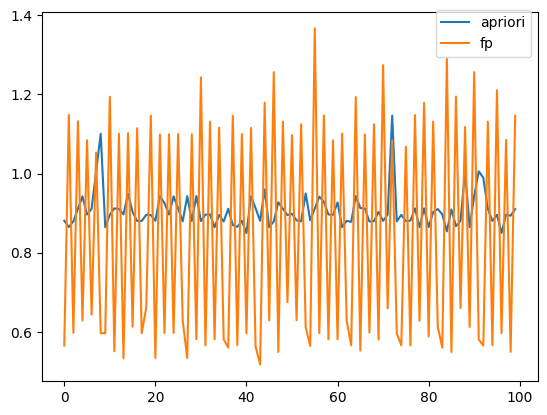

In [125]:
#Plotting the graphs for the time
plt.plot(exec_apriori, label='apriori')
plt.plot(exec_fp, label='fp')
plt.legend(bbox_to_anchor=(1, 1.022))
plt.show()

In [126]:
#Comparing the mean values
np.mean(exec_apriori), np.mean(exec_fp)

(0.9059824228286744, 0.8392397284507751)

### Recommendation
On average, FP-growth algorithm will take less time than Apriori algorithm for a given dataset for the same minimum support and minimum confidence.

In [13]:
#Function to mine association rules
def rules(algo, min_support, min_confidence):
    if algo == 'apriori':
        results = apriori(trans_df, min_support=min_support, use_colnames=True)
        rules = association_rules(results, 'confidence', min_threshold=min_confidence).sort_values('confidence', ascending=False)
    else:
        results = fpgrowth(trans_df, min_support=min_support, use_colnames=True)
        rules = association_rules(results, 'confidence', min_threshold=min_confidence).sort_values('confidence', ascending=False)
    return rules[['antecedents', 'consequents', 'confidence']]
        
def main():
    alg = input('Enter the name of the algorithm: ')
    try:
        assert(alg in ['apriori', 'fpgrowth'])
        support = float(input('Enter the minimum support(in %): '))
        confidence = float(input('Enter the minimum confidence(in %): '))
        print(rules(alg, support/100, confidence/100))
    except Exception as e:
        print(e)
        print('Invalid algorithm')
    
main()

Enter the name of the algorithm: apriori
Enter the minimum support(in %): 2
Enter the minimum confidence(in %): 20
                                    antecedents     consequents  confidence
1304  (other vegetables, yogurt, bottled water)    (whole milk)    0.682540
531               (bottled beer, shopping bags)    (whole milk)    0.661017
1356     (other vegetables, yogurt, rolls/buns)    (whole milk)    0.656863
713                (canned beer, shopping bags)    (whole milk)    0.656489
1377           (other vegetables, yogurt, soda)    (whole milk)    0.648810
...                                         ...             ...         ...
839                    (other vegetables, soda)   (frankfurter)    0.200413
506                    (other vegetables, soda)  (bottled beer)    0.200413
373                                    (yogurt)     (pip fruit)    0.200363
715                          (whole milk, soda)   (canned beer)    0.200340
166                                 (pip fruit)  